<a href="https://www.kaggle.com/code/chandruuk/housing-prices-competition?scriptVersionId=105473488" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


# Reading Dataset 

In [65]:
dataTrain=pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")

In [66]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [67]:
dataTrain.shape

(1460, 81)

In [68]:
dataTrain.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Feature Selection

In [69]:
data=dataTrain.select_dtypes(include='number')

In [70]:
data.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [71]:
num = data['LotFrontage'].mode()[0]
data.loc[data["LotFrontage"].isna(), 'LotFrontage'] = num

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [72]:
num = data['GarageYrBlt'].mode()[0]
data.loc[data["GarageYrBlt"].isna(), 'GarageYrBlt'] = num

In [73]:
data.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [74]:
data.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [75]:
data.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,60.0,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000


**Outlier**

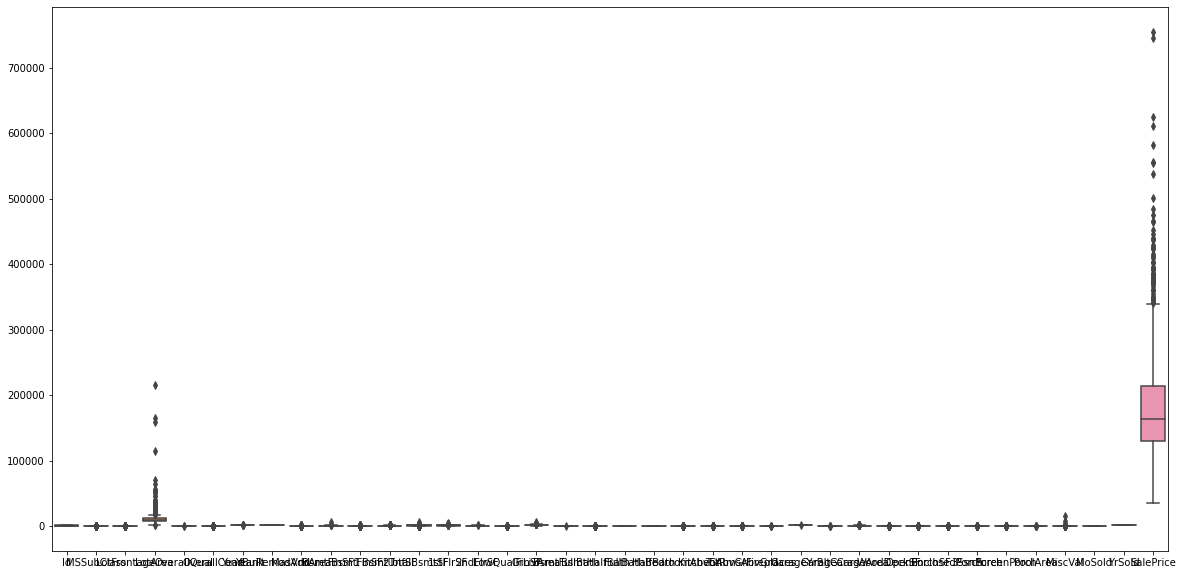

In [76]:
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

In [77]:
data.isnull().sum().sum()

8

In [78]:
data=data.dropna(axis=0)

In [79]:
data.isnull().sum().sum()

data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [91]:
data.shape

(1452, 38)

# Feature Selection

In [87]:
X=data
y=dataTrain['SalePrice']
print("X - ", X.shape, "\ny - ", y.shape)

X -  (1452, 38) 
y -  (1460,)


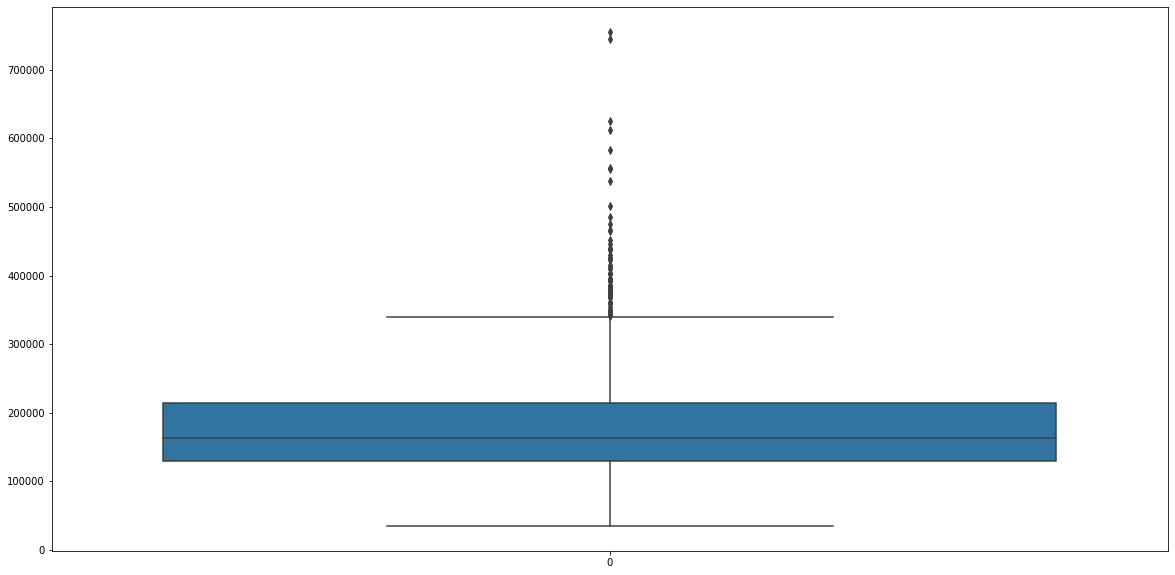

In [92]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=dataTrain["SalePrice"])
plt.show()

In [95]:
dataTrain = dataTrain[dataTrain['SalePrice']<535000]
y=dataTrain['SalePrice']

In [96]:
print("X - ", X.shape, "\ny - ", y.shape)

X -  (1452, 38) 
y -  (1452,)


In [97]:
#Apply SelectKBest and extract top 10 features
from sklearn.feature_selection import SelectKBest
from sklearn.utils import resample
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
best=SelectKBest(score_func=chi2, k=10)

In [98]:
fit=best.fit(X,y)

In [99]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [100]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

         Feature         Score
37     SalePrice  3.172749e+07
34       MiscVal  7.563580e+06
3        LotArea  5.041317e+06
33      PoolArea  4.414794e+05
14      2ndFlrSF  3.956231e+05
10    BsmtFinSF2  3.870761e+05
9     BsmtFinSF1  3.167477e+05
11     BsmtUnfSF  2.509988e+05
8     MasVnrArea  2.204967e+05
15  LowQualFinSF  1.771404e+05
31     3SsnPorch  1.625661e+05


In [101]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1']

In [102]:
data=data[['LotArea',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'MasVnrArea',
 'BsmtUnfSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotalBsmtSF',
 'Id']]
X=data
data.head()

,LotArea,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,MasVnrArea,BsmtUnfSF,LowQualFinSF,GrLivArea,TotalBsmtSF,Id
0,8450,854,706,0,196.0,150,0,1710,856,1
1,9600,0,978,0,0.0,284,0,1262,1262,2
2,11250,866,486,0,162.0,434,0,1786,920,3
3,9550,756,216,0,0.0,540,0,1717,756,4
4,14260,1053,655,0,350.0,490,0,2198,1145,5


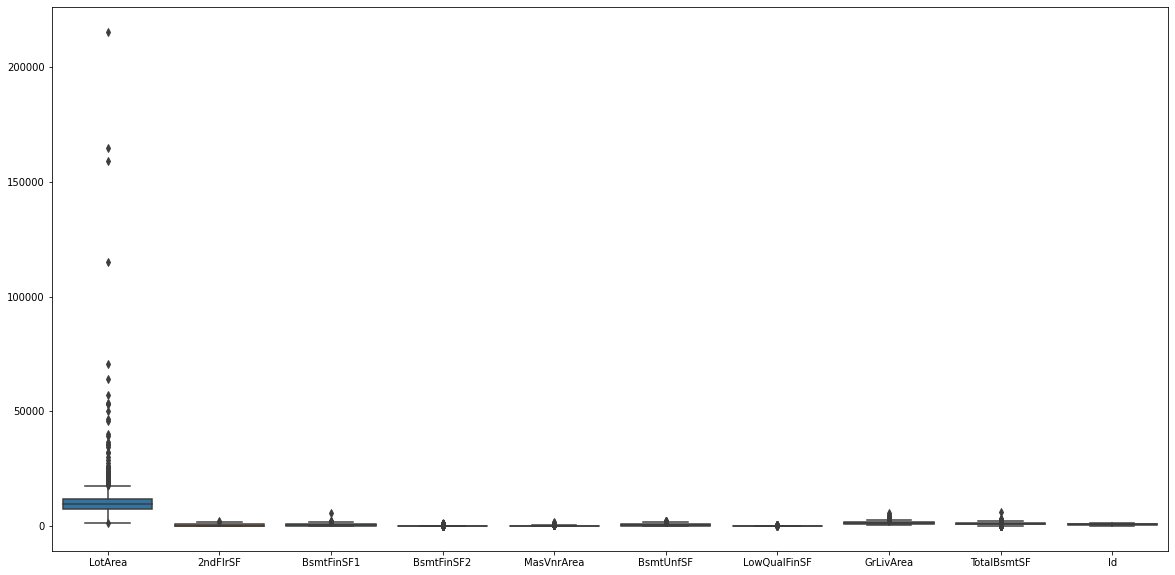

In [103]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

In [104]:
data.sort_values(by=['LotArea'],ascending=False)

,LotArea,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,MasVnrArea,BsmtUnfSF,LowQualFinSF,GrLivArea,TotalBsmtSF,Id
313,215245,0,1236,820,0.0,80,0,2036,2136,314
335,164660,167,1249,147,0.0,103,0,1786,1499,336
249,159000,700,697,0,472.0,747,0,2144,1444,250
706,115149,0,1219,0,351.0,424,0,1824,1643,707
451,70761,0,655,0,0.0,878,0,1533,1533,452
...,...,...,...,...,...,...,...,...,...,...
1038,1533,546,0,0,0.0,546,0,1344,546,1039
489,1526,0,515,0,0.0,115,0,630,630,490
614,1491,0,150,480,0.0,0,0,630,630,615
1039,1477,0,509,0,0.0,121,0,630,630,1040


In [108]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1,)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
#print(classification_report(test_y,lr_predict))

confussion matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Accuracy of Logistic Regression: 0.5163511187607573 



In [111]:
print("Making predictions for the following 5 houses:")
print(X.head(5))
print("The predictions are")
print(lr.predict(X.head(5)))

Making predictions for the following 5 houses:
   LotArea  2ndFlrSF  BsmtFinSF1  BsmtFinSF2  MasVnrArea  BsmtUnfSF  \
0     8450       854         706           0       196.0        150   
1     9600         0         978           0         0.0        284   
2    11250       866         486           0       162.0        434   
3     9550       756         216           0         0.0        540   
4    14260      1053         655           0       350.0        490   

   LowQualFinSF  GrLivArea  TotalBsmtSF  Id  
0             0       1710          856   1  
1             0       1262         1262   2  
2             0       1786          920   3  
3             0       1717          756   4  
4             0       2198         1145   5  
The predictions are
[119900 119900 119900 119900 119900]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
